<a href="https://colab.research.google.com/github/Atchu167/Project/blob/main/Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset
df = pd.read_excel("customer_transactions_large.xlsx")
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df.head()

,customer_id,order_id,purchase_date,order_value
0,CUST0182,ORD00833,2023-01-01,853.29
1,CUST0036,ORD00249,2023-01-01,1474.66
2,CUST0046,ORD01239,2023-01-01,1440.36
3,CUST0002,ORD01139,2023-01-01,1126.44
4,CUST0096,ORD00824,2023-01-01,228.71


In [ ]:
# Reference date for recency calculation
today = df['purchase_date'].max() + pd.Timedelta(days=1)

In [ ]:
# Group and calculate features
rfm = df.groupby('customer_id').agg({
    'purchase_date': lambda x: (today - x.max()).days,
    'order_id': 'nunique',
    'order_value': ['sum', 'mean']
})
rfm.columns = ['recency', 'frequency', 'ltv', 'aov']
rfm = rfm.reset_index()
rfm.head()

,customer_id,recency,frequency,ltv,aov
0,CUST0001,537,9,7729.37,858.818889
1,CUST0002,421,11,8636.32,785.120000
2,CUST0003,1011,11,8760.31,796.391818
3,CUST0004,773,11,6061.97,551.088182
4,CUST0005,509,14,11815.35,843.953571


In [ ]:
# Split into features and target
X = rfm[['recency', 'frequency', 'aov']]
y = rfm['ltv']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from xgboost import XGBRegressor

# Define and train the model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test set
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions) * 0.5

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 306.57
Root Mean Squared Error (RMSE): 172253.90


In [ ]:
import joblib
joblib.dump(model,"ltv_xgb_model.pkl")

['ltv_xgb_model.pkl']

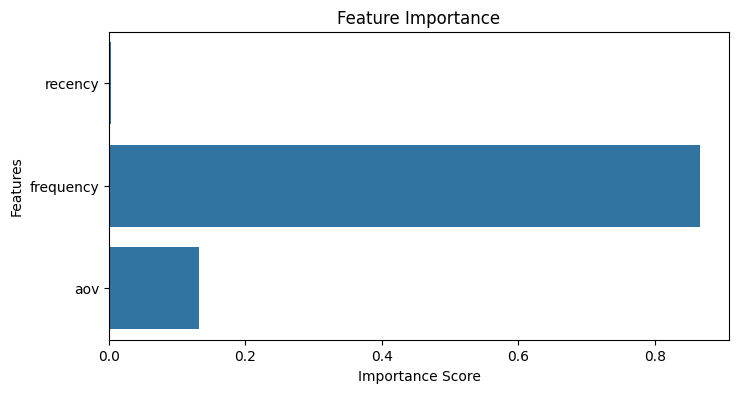

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=['recency', 'frequency', 'aov'])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

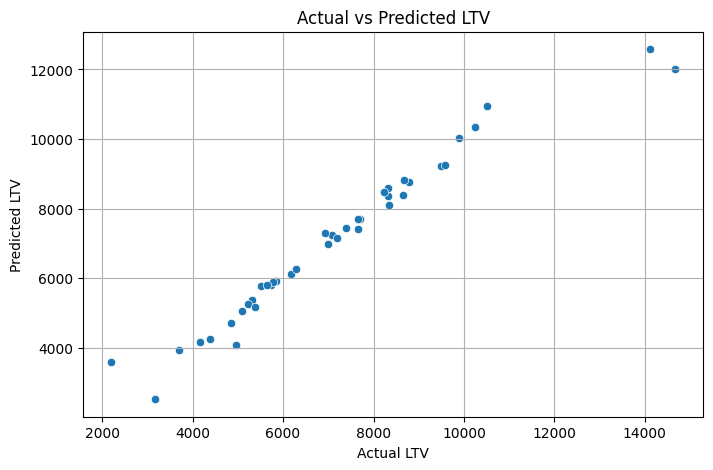

In [ ]:
# Compare actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Actual vs Predicted LTV")
plt.grid(True)
plt.show()

In [ ]:
#if not already defined
X=rfm[['recency', 'frequency', 'aov']]
rfm['ltv_pred']=model.predict(X)

In [ ]:
rfm['segment']=pd.qcut(rfm['ltv_pred'],q=3,labels=["Low","Mid","High"])

/tmp/ipython-input-18-876204792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='segment', palette='Set2')


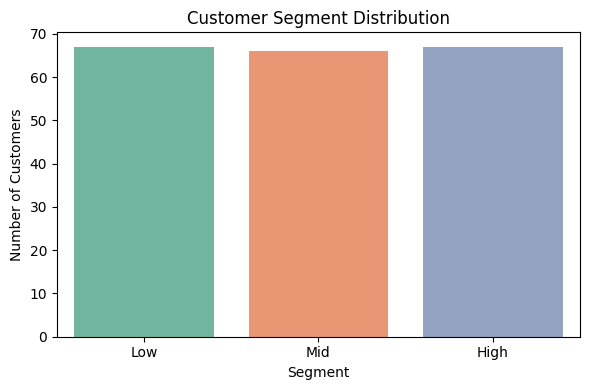

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=rfm, x='segment', palette='Set2')
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [ ]:
rfm.to_csv("customer_ltv_predictions.csv",index=False)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.1 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=02d6cfb81cf04fac1f59f5c05f656268cdb499a38931e3bdabff75777527b80b
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 111.3 MB/s eta 0:00:00


In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd
import joblib

st.title("Customer LTV Prediction")

df = pd.read_csv("customer_ltv_predictions.csv")
st.dataframe(df)

segment_count = df['segment'].value_counts()
st.bar_chart(segment_count)

model = joblib.load("ltv_xgb_model.pkl")
recency = st.slider("Recency (days)", 1, 1000, 300)
frequency = st.slider("Frequency", 1, 50, 10)
aov = st.slider("Avg Order Value", 50, 1500, 500)

if st.button("Predict LTV"):
    prediction = model.predict([[recency, frequency, aov]])
    st.success(f"Predicted LTV: ₹{prediction[0]:,.2f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


2025-07-13 05:52:16.765 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 05:52:16.898 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-13 05:52:16.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 05:52:16.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 05:52:16.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 05:52:16.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 05:52:16.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 05:52:17.263 Thread 'MainThread': mi

In [ ]:
cd path/to/ltv_app
streamlit run app.py

SyntaxError: invalid syntax (ipython-input-26-3895396533.py, line 1)